<a href="https://colab.research.google.com/github/AKSHAY-AKKI009/Pandas-tutorial/blob/main/pandastutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
DatasetBaseFolder = '/content/gdrive/MyDrive/Colab Notebooks/PandasTl/Datasets/'

In [5]:
movies_df = pd.read_csv(DatasetBaseFolder+"IMDB-Movie-Data.csv", index_col="Title")

In [6]:
movies_df.head(5)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [7]:
movies_df.tail(5)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [8]:
movies_df.shape

(1000, 11)

In [9]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


In [10]:
movies_df = movies_df.drop_duplicates(keep = 'first')

In [11]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [12]:
movies_df.rename(columns = {'Runtime (Minutes)' : 'Runtime', 'Revenue (Millions)' : 'Revenue_millions'}, inplace=True)
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

In [13]:
movies_df.isnull().sum()

Rank                  0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime               0
Rating                0
Votes                 0
Revenue_millions    128
Metascore            64
dtype: int64

In [14]:
movies_dfTmp = movies_df.dropna(axis=0) #To drop instances with null values
movies_dfTmp.shape

(838, 11)

In [15]:
movies_dfTmp = movies_df.dropna(axis=1) #To drop columns containing null values
movies_dfTmp.shape

(1000, 9)

In [16]:
movies_df.shape

(1000, 11)

In [17]:
revenue = movies_df['Revenue_millions']
revenue.head(5)

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: Revenue_millions, dtype: float64

In [18]:
meanRev = revenue.mean(0)
revenue.fillna(meanRev, inplace=True)
movies_df.isnull().sum()


Rank                 0
Genre                0
Description          0
Director             0
Actors               0
Year                 0
Runtime              0
Rating               0
Votes                0
Revenue_millions     0
Metascore           64
dtype: int64

In [19]:
movies_df.describe()

,Rank,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


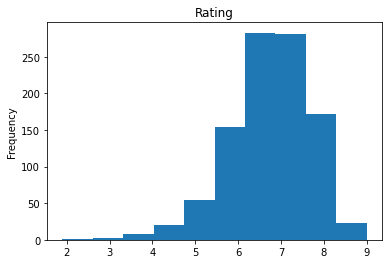

In [20]:
movies_df['Rating'].plot(kind='hist', title='Rating');

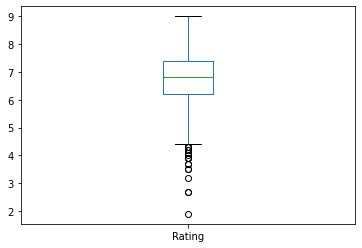

In [21]:
movies_df['Rating'].plot(kind="box");

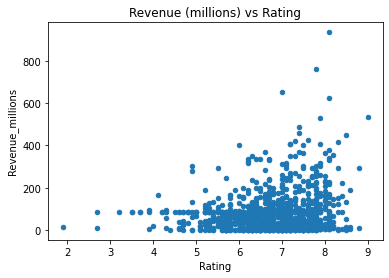

In [22]:
movies_df.plot(kind='scatter', x='Rating', y='Revenue_millions', title='Revenue (millions) vs Rating');
